In [153]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as pl

In [7]:
# read all confirmed planets from the exoplanet archive
targets = Table.read('../targets.txt', format='ascii', comment='#')

In [23]:
transit_time = np.array([targets['pl_tranmid'] + i*targets['pl_orbper'] for i in range(100)]).T
from astropy.time import Time

def tobjd(time):
    return Time(time, format='isot', scale='utc').jd

import matplotlib.dates as dates
plot_date = lambda jd: dates.datestr2num([(Time(jd, format='jd').iso)[:10] for jd in jd])

In [145]:
stname = 'Kepler-69'
plname = 'Kepler-69 c'
vis = np.loadtxt('../../visibility/jwst_gtvt/{0}.dat'.format(stname), skiprows=19, converters={0: tobjd})
windows = np.loadtxt(open('../../visibility/jwst_gtvt/{0}.dat'.format(stname)).readlines()[9:13], converters={0: tobjd, 1: tobjd})
breaks = [np.where(np.isclose(vis[:, 0], windows[:,1][i], rtol=1e-12))[0][0] for i in range(len(windows))]
breaks = np.insert(breaks, 0, 0)

In [146]:
i = np.where(targets['pl_name'] == plname)[0][0]
print("max uncertainty: {0} hours".format(100*2*24*targets['pl_orbpererr1'][i]))

max uncertainty: 14.952 hours


<ipython-input-147-3c39a1b701ca>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl.gca().set_xticklabels(x_ticks_labels, rotation=45, fontsize=15, ha='right');


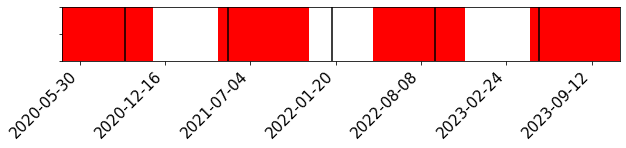

In [147]:
start = windows[:, 0]
end = windows[:, 1]

transits = transit_time[i]

pl.figure(figsize=(10, 1))
[pl.axvline(t, color='k') for t in transits]
[pl.axvspan(s, e, color='r') for s, e in zip(start, end)]
pl.xlim(start[0], end[-1])
pl.ylim(0, 2)
pl.gca().set_yticklabels([], fontsize=15)
pl.gca().set_xticklabels(x_ticks_labels, rotation=45, fontsize=15, ha='right');
pl.savefig('visibility_{0}.png'.format(plname))

<ipython-input-216-b478430dc41f>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl.gca().set_xticklabels(x_ticks_labels, rotation=45, fontsize=15, ha='right');


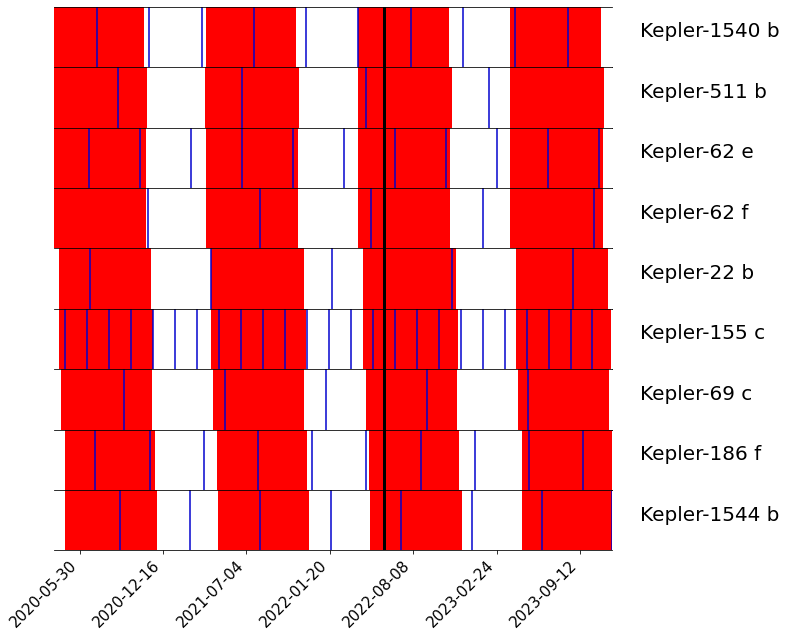

In [216]:
stnames = ['Kepler-1540', 
           'Kepler-511',
           'Kepler-62', 
           'Kepler-62',
           'Kepler-22',
           'Kepler-155',
           'Kepler-69',
           'Kepler-186',
           'Kepler-1544']
plnames = ['Kepler-1540 b',
           'Kepler-511 b', 
           'Kepler-62 e', 
           'Kepler-62 f',
           'Kepler-22 b',
           'Kepler-155 c',
           'Kepler-69 c',
           'Kepler-186 f',
           'Kepler-1544 b']
fig, axs = pl.subplots(len(stnames), 1, figsize=(10, 10), sharex=True)
pl.subplots_adjust(hspace=0)
minstart = np.inf
maxend = -np.inf
for ax, s, p in zip(axs, stnames, plnames):
    vis = np.loadtxt('../../visibility/jwst_gtvt/{0}.dat'.format(s), skiprows=19, converters={0: tobjd})
    windows = np.loadtxt(open('../../visibility/jwst_gtvt/{0}.dat'.format(s)).readlines()[9:13], converters={0: tobjd, 1: tobjd})
    breaks = [np.where(np.isclose(vis[:, 0], windows[:,1][i], rtol=1e-12))[0][0] for i in range(len(windows))]
    breaks = np.insert(breaks, 0, 0)
    i = np.where(targets['pl_name'] == p)[0][0]
    if windows[:, 0][0] < minstart:
        minstart = windows[:, 0][0]
    if windows[:, 1][-1] > maxend:
        maxend = windows[:, 1][-1]
    start = windows[:, 0]
    end = windows[:, 1]

    transits = transit_time[i]

    [ax.axvline(t, color='mediumblue') for t in transits]
    [ax.axvspan(s, e, color='r', linewidth=3) for s, e in zip(start, end)]
    ax.set_ylim(0, 2)
    ax.set_yticks(ticks=[])
    ax.set_yticklabels([], fontsize=15)
    ax.annotate(p, xy=(1.05, 0.5), xycoords='axes fraction', fontsize=20)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.axvline(Time('2022-5-31', format='iso').jd, color='k', linewidth=3)
pl.xlim(minstart, maxend)
x_ticks_labels = [t[:10] for t in Time(pl.xticks()[0], format='jd').iso]
pl.gca().set_xticklabels(x_ticks_labels, rotation=45, fontsize=15, ha='right');
pl.savefig('visibility.pdf')

In [214]:
Time('2022-5-31', format='iso').plot_date

738306.0

In [231]:
targets[targets['pl_name'] == 'Kepler-69 c']['pl_minmass_med']

0.011648295792924913


In [243]:
transit_time[targets['pl_name'] == 'Kepler-22 b']

array([[2454966.69506 , 2455256.559516, 2455546.423972, 2455836.288428,
        2456126.152884, 2456416.01734 , 2456705.881796, 2456995.746252,
        2457285.610708, 2457575.475164, 2457865.33962 , 2458155.204076,
        2458445.068532, 2458734.932988, 2459024.797444, 2459314.6619  ,
        2459604.526356, 2459894.390812, 2460184.255268, 2460474.119724,
        2460763.98418 , 2461053.848636, 2461343.713092, 2461633.577548,
        2461923.442004, 2462213.30646 , 2462503.170916, 2462793.035372,
        2463082.899828, 2463372.764284, 2463662.62874 , 2463952.493196,
        2464242.357652, 2464532.222108, 2464822.086564, 2465111.95102 ,
        2465401.815476, 2465691.679932, 2465981.544388, 2466271.408844,
        2466561.2733  , 2466851.137756, 2467141.002212, 2467430.866668,
        2467720.731124, 2468010.59558 , 2468300.460036, 2468590.324492,
        2468880.188948, 2469170.053404, 2469459.91786 , 2469749.782316,
        2470039.646772, 2470329.511228, 2470619.375684, 2470909.

In [245]:
100 * targets[targets['pl_name'] == 'Kepler-22 b']['pl_orbpererr1'] * 24

3.0935999999999995


In [253]:
Time('2022-04-04', format='iso').jd

2459673.5

In [258]:
Time(2455545.2348, format='jd').iso

'2010-12-14 17:38:06.720'